### Домашнє завдання: Пониження розмірностей для Аналізу Портретів Клієнтів

#### Контекст
В цьому ДЗ ми попрацюємо з методами пониження розмірності на наборі даних для задачі аналізу портретів клієнтів (Customer Personality Analysis). **В попередньому ДЗ ми працювали з цими даними використовуючи кластеризацію, зараз використаємо кластеризацію і візуалізауємо результати з різними методами.**

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


Для початку, запустіть код нижче. Всі ці кроки ми робили в попередньому ДЗ і для того, щоб результати кластеризації у нас були схожими, потрібно аби передобробка була однаковою.

In [1]:
import pandas as pd

# 1. Завантаження даних
df = pd.read_csv('https://raw.githubusercontent.com/roldugina/Machine_learning_course/main/marketing_campaign.csv', sep='\t')

# 2. Обробка пропущених значень
df['Income_not_filled'] = df.Income.isna()
df.Income = df.Income.fillna(-1)

# 3. Обробка дати реєстрації
df.Dt_Customer = pd.to_datetime(df.Dt_Customer, format='%d-%m-%Y')
today = df.Dt_Customer.max()
df['days_lifetime'] = (today - df.Dt_Customer).dt.days
df['years_customer'] = df.Year_Birth.apply(lambda x: today.year - x)

# 4. Категоризація рівня освіти
df_education = pd.get_dummies(df.Education, prefix='education').astype(int)
df = pd.concat([df, df_education], axis=1)

# 5. Очищення сімейного стану
marital_status_map = {'Alone': 'Single', 'Absurd': 'Else', 'YOLO': 'Else'}
df['Marital_Status_clean'] = df.Marital_Status.map(marital_status_map)
df_ms = pd.get_dummies(df.Marital_Status_clean, prefix='marital').astype(int)
df = pd.concat([df, df_ms], axis=1)

# 6. Форматування доходу і видалення викиду
df.Income = df.Income.astype(int)
df = df[df.Income != 666666]

# 7. Створення фінального набору даних
X = df.drop(['ID', 'Dt_Customer', 'Education', 'Marital_Status', 'Marital_Status_clean'], axis=1)
X.reset_index(drop=True, inplace=True)

### Завдання 1: Виконання кластеризації та пониження розмірності для візуалізації результатів

Ваше завдання — провести кластеризацію клієнтів та візуалізувати результати кластеризації, використовуючи метод головних компонент (PCA) для пониження розмірності даних.

#### Інструкції:

1. **Вибір ключових характеристик:**
   Давайте обмежимось тільки наступними хараткеристиками для кластеризації цього разу:
   - `Income`: Річний дохід домогосподарства клієнта
   - `Recency`: Кількість днів з моменту останньої покупки клієнта
   - `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
   - `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
   - `days_lifetime`: Кількість днів з моменту реєстрації клієнта у компанії
   - `years_customer`: Вік клієнта
   - `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць
   Відберіть в наборі даних `X` лише ці характеристики.

2. **Нормалізація даних:**
   Використайте метод `MinMaxScaler` для нормалізації значень обраних характеристик.

3. **Кластеризація:**
   Проведіть кластеризацію клієнтів, використовуючи метод `KMeans` з трьома кластерами.

4. **Пониження розмірності:**
   Використайте метод головних компонент (PCA) для пониження розмірності даних до трьох компонент.

5. **Візуалізація результатів:**
   Використовуючи plolty express побудуйте 3D-графік розподілу клієнтів у просторі трьох головних компонент, де кольором позначено кластери.

6. **Опишіть, що спостерігаєте:**
   Чи кластеризація чітко розділила дані?

Далі ми детальніше проінтерпретуємо результати візуалізації і пониження розмірностей.

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def dim_reduct_pca(X, columns_list, n_clusters, n_components):

  kmeans = KMeans(n_clusters=n_clusters, n_init='auto')
  kmeans.fit(X[columns_list])
  labels = kmeans.labels_

  pca = PCA(n_components=n_components, random_state=0)
  pcadata = pca.fit_transform(X[columns_list])
  df_pca = pd.DataFrame(data=pcadata, columns=['PCA1', 'PCA2', 'PCA3'])
  df_pca['Target'] = labels
  print('\nДані з пониженою розмірністю:')
  display(df_pca)
  return df_pca, kmeans, pca

In [4]:
columns_list = ['Income', 'Recency', 'NumStorePurchases', 'NumDealsPurchases', 'days_lifetime', 'years_customer', 'NumWebVisitsMonth']
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(X[columns_list])
X.loc[:, columns_list] = minmaxscaler.transform(X[columns_list])
print('Нормовані вхідні дані:')
display(X.loc[:, columns_list].describe())

df_pca, kmeans, pca = dim_reduct_pca(X, columns_list, 3,3)

Нормовані вхідні дані:


,Income,Recency,NumStorePurchases,NumDealsPurchases,days_lifetime,years_customer,NumWebVisitsMonth
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,0.316591,0.496172,0.445494,0.154950,0.505815,0.264057,0.265811
std,0.135898,0.292562,0.250088,0.128823,0.289222,0.116364,0.121357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.213777,0.242424,0.230769,0.066667,0.258226,0.184466,0.150000
50%,0.314290,0.494949,0.384615,0.133333,0.507868,0.252427,0.300000
75%,0.420439,0.747475,0.615385,0.200000,0.756795,0.359223,0.350000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Дані з пониженою розмірністю:


,PCA1,PCA2,PCA3,Target
0,0.380238,0.093351,0.247944,2
1,-0.422398,-0.107615,0.130675,0
2,-0.071943,0.238744,-0.349257,1
3,-0.414681,0.039905,0.103791,0
4,0.012613,-0.501960,-0.112838,2
...,...,...,...,...
2234,-0.020865,0.019878,0.095642,1
2235,-0.333616,-0.254224,-0.104322,0
2236,0.118699,-0.392862,-0.549790,2
2237,-0.337308,0.303947,-0.425197,0


In [5]:
fig = px.scatter_3d(
    df_pca,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='Target',
    hover_data='Target',
    title='2D Scatter Plot of PCA Components',
    labels={'target': 'Class'}
)
fig.show()

**Висновки**

1. Метод PCA розділив дані на компактні кластери з чіткими границями. Особливо добре всі 3 кластери спостерігаються у парі компонент PCA1 та PCA2.

### Завдання 2: Аналіз результатів пониження розмірності

1. **Розрахунок частки поясненої дисперсії:**
   Визначте, яка частка загальної варіації даних пояснюється кожною з трьох головних компонент (PC1, PC2, PC3) за допомогою атрибуту `explained_variance_ratio_` об'єкта PCA. Виведіть результат на екран.

2. **Розрахунок кумулятивної частки поясненої дисперсії:**
   Обчисліть кумулятивну частку поясненої дисперсії для трьох головних компонент, щоб зрозуміти, скільки варіації даних пояснюється першими кількома компонентами.

In [6]:
print(f'Частина варіації даних, яка пояснюється компонентою РСA1: {round(pca.explained_variance_ratio_[0],6)}')
print(f'Частина варіації даних, яка пояснюється компонентою РСA2: {round(pca.explained_variance_ratio_[1],6)}')
print(f'Частина варіації даних, яка пояснюється компонентою РСA3: {round(pca.explained_variance_ratio_[2],6)}')
print(f'Загальна варіація даних, яка пояснюється компонентами PCA {round(pca.explained_variance_ratio_.sum(),6)}')

Частина варіації даних, яка пояснюється компонентою РСA1: 0.302034
Частина варіації даних, яка пояснюється компонентою РСA2: 0.286653
Частина варіації даних, яка пояснюється компонентою РСA3: 0.251224
Загальна варіація даних, яка пояснюється компонентами PCA 0.839912


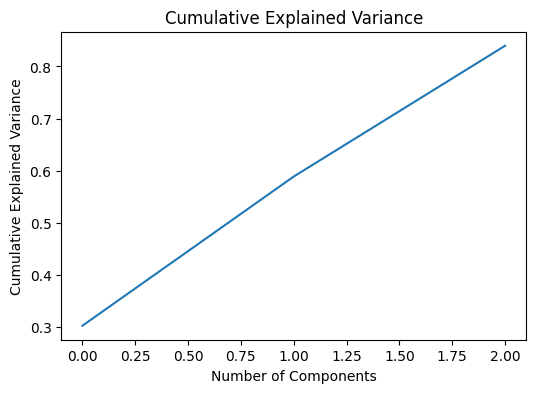

In [7]:
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance');

**Висновки**

Першими 3-ма компонентами пояснюється сумарна варіація 0.861415.

### Завдання 3: Інтерпретація "Loadings"

Продовжуємо інтерпретацію результатів `PCA`і познайомимось з новим поняттям `loadings`, яке допоможе нам знайти звʼязок між головними компонентами і оригінальними ознаками в наборі даних.

Ми зараз побудували візуалізацію кластерів точок даних в просторі трьох головних компонент. Але хочеться знайти звʼязок між головними компонентами і оригінальними ознаками. Для розуміння, які початкові характеристики даних мають найбільший вплив на ці головні компоненти, ми можемо використати атрибут `components_` методу `PCA`.

#### Що таке `pca.components_`?

`pca.components_` — це масив, який містить коефіцієнти (або "ваги"), що показують внесок кожної вихідної ознаки у кожну з головних компонент. Ці коефіцієнти ще називаються **"loading"** або "навантаженнями" компонент.

- **Loadings** (`навантаження`) відображають важливість кожної змінної (ознаки) для відповідної головної компоненти. Вони показують, яким чином змінні поєднуються, щоб утворити нові, зменшені вимірювання.
- Якщо коефіцієнт має високе абсолютне значення (як позитивне, так і негативне), це вказує на те, що відповідна змінна сильно впливає на головну компоненту.

#### Саме завдання
Ваше завдання — обчислити "навантаження" для кожної з головних компонент і інтерпретувати результати.

1. **Обчислення loadings для компонент:**
   Використайте атрибут `components_` об'єкта PCA для створення DataFrame, який відображатиме внесок кожної вихідної ознаки в кожну головну компоненту.

2. **Інтерпретація результатів:**
   Виведіть значення "навантажень" і проаналізуйте, які ознаки найбільше впливають на кожну головну компоненту.

In [8]:
def loadings(pca, columns_list):
  df_loadings = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=columns_list)
  print('\nНавантаження компонент (loadings):')
  display(df_loadings)
  return df_loadings

df_loadings = loadings(pca, columns_list)


Навантаження компонент (loadings):


,PCA1,PCA2,PCA3
Income,0.063557,0.047082,-0.373826
Recency,0.475786,-0.878876,-0.029910
NumStorePurchases,0.284282,0.187195,-0.816668
NumDealsPurchases,0.103049,0.059324,0.050687
days_lifetime,0.821912,0.431061,0.305490
years_customer,0.012658,-0.001022,-0.080411
NumWebVisitsMonth,0.049530,0.031377,0.300089


**Висновки**

На головні компоненти найбільше впливають ознаки:

* на РСА1 - days_lifetime (найбільший вплив, позитивно), Recency,NumStorePurchases (позитивно);
* на РСА2 - Recency (найбільший вплив, негативно), days_lifetime, NumStorePurchases (позитивно);
* на PCA3 - NumStorePurchases (найбільший вплив, негативно), days_lifetime, NumWebVisitsMonth (позитивно), Income (негативно).

Ознаки NumDealsPurchases, years_customer не мають сильного впливу.

###Завдання 4
Давайте проаналізуємо "навантаження" (**loadings**) для трьох головних компонент після вилучення ознаки `Income`. Це допоможе нам зрозуміти, як змінилася важливість інших ознак для кожної головної компоненти, коли одна з ключових характеристик (`Income`) була вилучена.

#### Кроки для проведення аналізу і ваше завдання:

1. Видаліть ознаку `Income` з нашого набору даних `X` і повторно виконайте PCA (метод головних компонент) для отримання нових "навантажень".

2. Обчисліть нові "навантаження" для трьох головних компонент на наборі даних без `Income`

3. Проаналізуйте, які ознаки мають найбільший вплив на кожну головну компоненту після вилучення `Income`.

4. Перегляньте, наскільки кожна з головних компонент пояснює дисперсію в даних без ознаки `Income`.

In [9]:
columns_list2 = columns_list.copy()
if 'Income' in columns_list2: columns_list2.remove('Income')
df_pca, kmeans, pca = dim_reduct_pca(X, columns_list2, 3,3)

df_loadings = loadings(pca, columns_list2)

print(f'Частина варіації даних, яка пояснюється компонентою РСA1: {pca.explained_variance_ratio_[0]}')
print(f'Частина варіації даних, яка пояснюється компонентою РСA2: {pca.explained_variance_ratio_[1]}')
print(f'Частина варіації даних, яка пояснюється компонентою РСA3: {pca.explained_variance_ratio_[2]}')


Дані з пониженою розмірністю:


,PCA1,PCA2,PCA3,Target
0,0.390555,0.117978,0.245959,2
1,-0.408979,-0.110786,0.174026,0
2,-0.106123,0.211688,-0.335563,1
3,-0.402657,0.038392,0.079217,1
4,0.019929,-0.508389,-0.072955,0
...,...,...,...,...
2234,-0.017886,0.023401,0.130217,1
2235,-0.334156,-0.271314,-0.040152,0
2236,0.095322,-0.422794,-0.565380,0
2237,-0.377289,0.264945,-0.405460,1



Навантаження компонент (loadings):


,PCA1,PCA2,PCA3
Recency,0.500712,-0.865392,-0.008648
NumStorePurchases,0.226953,0.145537,-0.924549
NumDealsPurchases,0.105012,0.065833,0.027582
days_lifetime,0.825793,0.472036,0.232275
years_customer,0.007110,-0.005913,-0.079808
NumWebVisitsMonth,0.069051,0.052233,0.289919


Частина варіації даних, яка пояснюється компонентою РСA1: 0.3214903218272896
Частина варіації даних, яка пояснюється компонентою РСA2: 0.3054548774311496
Частина варіації даних, яка пояснюється компонентою РСA3: 0.2344693577618019


**Висновки**

Після видалення колонки Income змінились значення "навантаження" окремих компонент, але загальна картина впливу ознак залишилась.

### Завдання 5: Візуалізація кластеризації за допомогою t-SNE

Ваше завдання — використати метод t-SNE для візуалізації результатів кластеризації клієнтів у двовимірному просторі. Метод t-SNE допомагає знизити розмірність даних та зберегти локальні структури в даних, що робить його ефективним для візуалізації високорозмірних даних. Ми також зможемо порівняти результат цього методу з РСА.

1. Використайте метод t-SNE для зниження розмірності до 2х вимірів даних, які включають ознаки всі, що і в завданні 1, а також були відмасштабовані перед пониженням розмірностей.

2. Створіть новий DataFrame з координатами, отриманими після застосування t-SNE, та додайте до нього мітки кластерів.

3. Побудуйте інтерактивний 2D-графік розподілу клієнтів, де кольором буде позначено різні кластери і проаналізуйте графік з рекомендаціями нижче (можливо треба буде вивести додаткові візуалізації чи таблиці для інтерпретації, але треба прям зрозуміти, які ознаки формують який кластер і чим кластери відрізняються одне від одного).

  **Опишіть отримані кластери з точки зору ознак.**

4. Опишіть відмінність графіка tSNE від PCA.

#### ЯК можна інтерпретувати з t-SNE?

Хоча t-SNE не надає "компонентів" як РСА, він забезпечує низьковимірне представлення даних, яке можна візуально інтерпретувати:

- **Кластери:** t-SNE особливо добре показує кластери подібних точок. Якщо ви бачите чітко визначені кластери на графіку t-SNE, це свідчить про наявність груп схожих спостережень у ваших даних. Проаналізувати їх можемо, якщо додамо дані в `hover_data` або якщо якісь з даних виведемо як розмір чи форма точок на візуалізації. Також корисно може бути вивести середні значення ознак по кластерам.
- **Локальна структура:** Відносне розташування точок одного кластеру на графіку t-SNE може допомогти вам зрозуміти, які дані подібні між собою.
- **Глобальна структура:** Будьте обережні; t-SNE менш надійний для відображення глобальних структур (наприклад, відстаней між кластерами) у порівнянні з PCA, бо t-SNE націлений на збереження саме локальних структур.

In [10]:
%matplotlib inline
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(X[columns_list2])

df_tsne = pd.DataFrame(tsne_data, columns=['TSNE1','TSNE2'])
df_tsne['Target'] = kmeans.labels_
df_tsne[columns_list2] = X[columns_list2]

In [11]:
from plotly.subplots import make_subplots


fig1 = px.scatter(df_tsne, x='TSNE1', y='TSNE2', color='Target', hover_data=columns_list2, title='2D Scatter Plot of TSNE Components', labels={'target': 'Class'})
fig2 = px.scatter(df_pca, x='PCA1', y='PCA2', color='Target', hover_data='Target', title='2D Scatter Plot of PCA Components', labels={'target': 'Class'})

fig = make_subplots(rows=1, cols=2, subplot_titles=("TSNE components", "PCA components"))

fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.update_layout(height=800, width=1400, title_text="Dimension Reduction Methods")

fig.update_xaxes(title_text="TSNE1", row=1, col=1)
fig.update_yaxes(title_text="TSNE2", row=1, col=1)
fig.update_xaxes(title_text="PCA1", row=1, col=2)
fig.update_yaxes(title_text="PCA2", row=1, col=2)

fig.show()

In [12]:
tsne_analysis = np.asarray([df_tsne.groupby('Target').TSNE1.mean(), df_tsne.groupby('Target').TSNE2.mean()])
df_tsne_analysis = pd.DataFrame(tsne_analysis.T, columns=['TSNE1_mean', 'TSNE2_mean'])

for col in columns_list2:
  df_tsne_analysis[f'{col}_min'] = df_tsne.groupby('Target')[col].min()

for col in columns_list2:
  df_tsne_analysis[f'{col}_max'] = df_tsne.groupby('Target')[col].max()

df_tsne_analysis

,TSNE1_mean,TSNE2_mean,Recency_min,NumStorePurchases_min,NumDealsPurchases_min,days_lifetime_min,years_customer_min,NumWebVisitsMonth_min,Recency_max,NumStorePurchases_max,NumDealsPurchases_max,days_lifetime_max,years_customer_max,NumWebVisitsMonth_max
0,-7.357206,-27.906895,0.313131,0.0,0.0,0.00000,0.000000,0.0,1.000000,1.0,1.0,0.612303,0.932039,1.00
1,-19.346556,19.289082,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.505051,1.0,1.0,0.995708,1.000000,0.95
2,26.232595,4.280886,0.151515,0.0,0.0,0.44206,0.009709,0.0,1.000000,1.0,1.0,1.000000,0.533981,1.00


**Висновки**

1. Результати, які дають методи tsne та pca, близькі, але є відмінності, обумовлені принципом роботи кожного метода;
1. Після обробки методом PCA вийшли кластери з чіткими зовнішніми границями (через наявність нових ортогональних осей). В TSNE границі класів вийшли більш розмитими, є змішані значення. Немає чітких зовнішніх границь класів;
1. З точки зору ознак кластерів після пониження розмірності методом TSNE спостерігається така залежність:
* клас 0 - значення TSNE2 здебільшого нижче 0;
* клас 1 - значення TSNE1 здебільшого нижче 0, TSNE2 вище 0;
* клас 2 - TSNE1 вище 0.
3. Метод TSNE є нелінійним, тобто базується на нелінійній залежності ітогових ознак від вхідних. Тому дані неможливо прямо інтерпретувати.
Але аналіз показав, що по класам є такі загальні риси:
* 0 клас - більш низькі значення days_lifetime (максимальне значення 0.6123, в інших класах близько до 1);
* 1 клас - низькі значення Recency (максимальне значення 0.505051, в інших класах 1);
* високі значення days_lifetime (мінімальне значення 0.44206, в інших класах 0), низький years_customer (максимальне значення 0.533981, в інших класах 0.932039 та 1).
В цьому пункті вказані нормовані значення показників.